In [205]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import json

from tqdm import tqdm
from typing import *

In [3]:
df = pd.read_excel("shop_addrs_fixed.xlsx")
df.head(3)

,address,reviews,rating,shop,longitude,latitude
0,"Санкт-Петербург, Средний просп. Васильевского ...",83.0,4.2,Магнит,30.249909,59.937200
1,"Санкт-Петербург, Малый просп. Васильевского ос...",571.0,4.1,Магнит,30.240457,59.938315
2,"Санкт-Петербург, Наличная ул., 35, корп. 1, ко...",399.0,3.9,Магнит,30.232841,59.940740


In [4]:
df = df[df.reviews.notna()]

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.drop_duplicates()

,address,reviews,rating,shop,longitude,latitude
0,"Санкт-Петербург, Средний просп. Васильевского ...",83.0,4.2,Магнит,30.249909,59.937200
1,"Санкт-Петербург, Малый просп. Васильевского ос...",571.0,4.1,Магнит,30.240457,59.938315
2,"Санкт-Петербург, Наличная ул., 35, корп. 1, ко...",399.0,3.9,Магнит,30.232841,59.940740
3,"Санкт-Петербург, Гаванская ул., 34, литер А, п...",84.0,4.0,Магнит,30.238154,59.935557
4,"Санкт-Петербург, ул. Нахимова, 8",370.0,3.8,Магнит,30.234647,59.943310
...,...,...,...,...,...,...
1989,"Санкт-Петербург, просп. Ветеранов, 169, корп. ...",759.0,3.2,Дикси,30.113892,59.835943
1990,"Санкт-Петербург, Никольское ш., 1, Отрадное",465.0,2.8,Дикси,30.773946,59.761998
1991,"Санкт-Петербург, Центральная ул., 19, г. Отрадное",506.0,4.0,Дикси,30.796557,59.767081
1992,"Санкт-Петербург, ул. Гагарина, 8, г. Отрадное",449.0,3.6,Дикси,30.804156,59.769207


In [206]:
fig = px.scatter_mapbox(
    df, 
    lat="latitude", 
    lon="longitude", 
    hover_name="address", 
    hover_data=["address", "shop", "rating"],
    color="shop",
    size="reviews",
    color_discrete_map = {"Магнит": "red", "Перекресток": "blue", "Дикси": "orange"},
    zoom=7, 
    opacity=0.5,
    height=1000,
    width=800
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<h4>Среднее расстояние от каждого магазина до соперника</h4>

In [ ]:
import geopy.distance

distances = np.zeros((df.shape[0], df.shape[0]))

for i in tqdm(range(df.shape[0])):
    for j in range(i, df.shape[0]):
        distances[i,j] = geopy.distance.geodesic(df.iloc[i, 4:6], df.iloc[j, 4:6]).m

In [72]:
distances = np.load('distances.npy')

In [ ]:
closest_shops = []

for i in range(df.shape[0]):
    closest_idx = D[i, :].argsort()[:5]
    total_volume = df.reviews[closest_idx].sum()
    
    closest_data = []
    
    for idx in closest_idx:
        closest_data.append({
            "name": df.shop[idx],
            "distance": D[i, idx],
            "share_volume": df.reviews[idx] / total_volume
        })
    
    closest_shops.append(closest_data)

In [ ]:
closest_shops

In [ ]:
df_products = pd.read_csv("data.csv")

In [ ]:
def quantile_25(x):
    return x.quantile(0.25)

def quantile_75(x):
    return x.quantile(0.75)


df_products.groupby(
    ["shop", "category"]
)["currentPrice"].agg(["mean"])

<h3>Данные по 5 локациям</h3>

In [7]:
df_prod = pd.read_csv("data_final.csv", sep=";", low_memory=False)

In [8]:
df_prod.head(5)

,name,category,subcategory,currentPrice,previousPrice,discount,grammar,price_kilo,quantity,address,shop,rating,reviews
0,Чеснок тёртый 80г,"Овощи, фрукты, ягоды",Овощи,90.0,90.0,False,NaN,NaN,27.0,"Санкт-Петербург, Лиговский проспект, 2-4",Магнит,NaN,NaN
1,Чернослив Семушка без косточки 150г,"Овощи, фрукты, ягоды",Орехи и сухофрукты,190.0,250.0,True,NaN,NaN,3.0,"Санкт-Петербург, Лиговский проспект, 2-4",Магнит,NaN,NaN
2,Яблоки Симиренко,"Овощи, фрукты, ягоды",Фрукты,103.0,103.0,False,1.0,103.0,12.0,"Санкт-Петербург, Лиговский проспект, 2-4",Магнит,NaN,NaN
3,Картофель,"Овощи, фрукты, ягоды",Овощи,24.0,24.0,False,1.0,24.0,62.0,"Санкт-Петербург, Лиговский проспект, 2-4",Магнит,NaN,NaN
4,Капуста белокочанная,"Овощи, фрукты, ягоды",Овощи,50.0,50.0,False,2.5,20.0,55.0,"Санкт-Петербург, Лиговский проспект, 2-4",Магнит,NaN,NaN


<h3>Средние цены по всем магазинам по категориям</h3>

In [8]:
# Оставим (0.05, 0.95) квантили чтобы не было выбросов
quantiles = df_prod.groupby(
    ["shop", "category"]
)["currentPrice"].quantile([0.05, 0.95]).unstack(level=1)

quantiles

category          Алкоголь  Аптечка  Бытовая техника  Бытовая химия и гигиена  \
shop                                                                            
Дикси       0.05     1.849     8.00              NaN                     50.0   
            0.95   700.000   276.00              NaN                    500.0   
Магнит      0.05       NaN    63.30           31.000                     33.0   
            0.95       NaN   330.00          362.250                    470.0   
Перекресток 0.05     1.229     1.25            1.461                      1.9   
            0.95   869.800   883.00          597.400                    787.0   

category          Воды, соки, напитки  Готовая еда  Замороженные продукты  \
shop                                                                        
Дикси       0.05                 24.0         20.0                   20.0   
            0.95                290.0        110.0                  300.0   
Магнит      0.05                 35.0         24.5                   40.0   
            0.95                160.0        154.0                  400.0   
Перекресток 0.05                 34.0         80.0                   61.0   
            0.95                320.0        498.5                  700.0   

category          Здоровое питание  Зоотовары  Каталог  ...  Рыба, икра  \
shop                                                    ...               
Дикси       0.05              20.0     10.000      NaN  ...        43.5   
            0.95             160.0    390.000      NaN  ...       386.0   
Магнит      0.05              70.0     20.000      NaN  ...        60.0   
            0.95             300.0    450.000      NaN  ...       120.0   
Перекресток 0.05              22.0      1.579     79.0  ...         NaN   
            0.95             250.0    597.200    572.0  ...         NaN   

category          Рыба, икра   Сладости  Соусы и консервация  \
shop                                                           
Дикси       0.05       40.000      20.0                 27.0   
            0.95      300.000     400.0                200.0   
Магнит      0.05       60.000      33.0                 50.0   
            0.95      384.000     280.0                240.0   
Перекресток 0.05        1.412      36.0                 69.0   
            0.95      700.000     500.0                490.0   

category          Товары для дома и дачи  Товары для мам и детей  \
shop                                                               
Дикси       0.05                    7.00                  20.000   
            0.95                  400.00                 450.000   
Магнит      0.05                   19.75                   1.380   
            0.95                  360.00                 350.000   
Перекресток 0.05                    1.19                   1.254   
            0.95                  819.00                 819.000   

category          Ухо, горло, нос  Хлеб и выпечка  Чай, кофе, сахар  \
shop                                                                  
Дикси       0.05              NaN           10.00            30.000   
            0.95              NaN          100.00           370.000   
Магнит      0.05             32.0           25.00            25.000   
            0.95            300.0          173.50           530.000   
Перекресток 0.05            435.0           36.45             1.559   
            0.95            626.0          265.00           740.000   

category          Чипсы, снеки, орехи  
shop                                   
Дикси       0.05                 20.0  
            0.95                180.0  
Магнит      0.05                 30.0  
            0.95                210.0  
Перекресток 0.05                 30.0  
            0.95                447.0  

[6 rows x 25 columns]

In [12]:
quantiles.loc["Дикси", "Алкоголь"].tolist()

[1.849, 700.0]

In [18]:
# df_trimmed = pd.DataFrame()

# for shop in df_prod.shop.unique():
#     for category in df_prod.category.unique():
#         df_cur = df_prod[(df_prod.shop == shop) & (df_prod.category == category)]
#         quantiles = df_cur.currentPrice.quantile([.05, .95]).tolist()
#         df_quan = df_cur[(quantiles[0] <= df_cur.currentPrice) & (df_cur.currentPrice <= quantiles[1])]
#         df_trimmed = pd.concat([df_trimmed, df_quan])

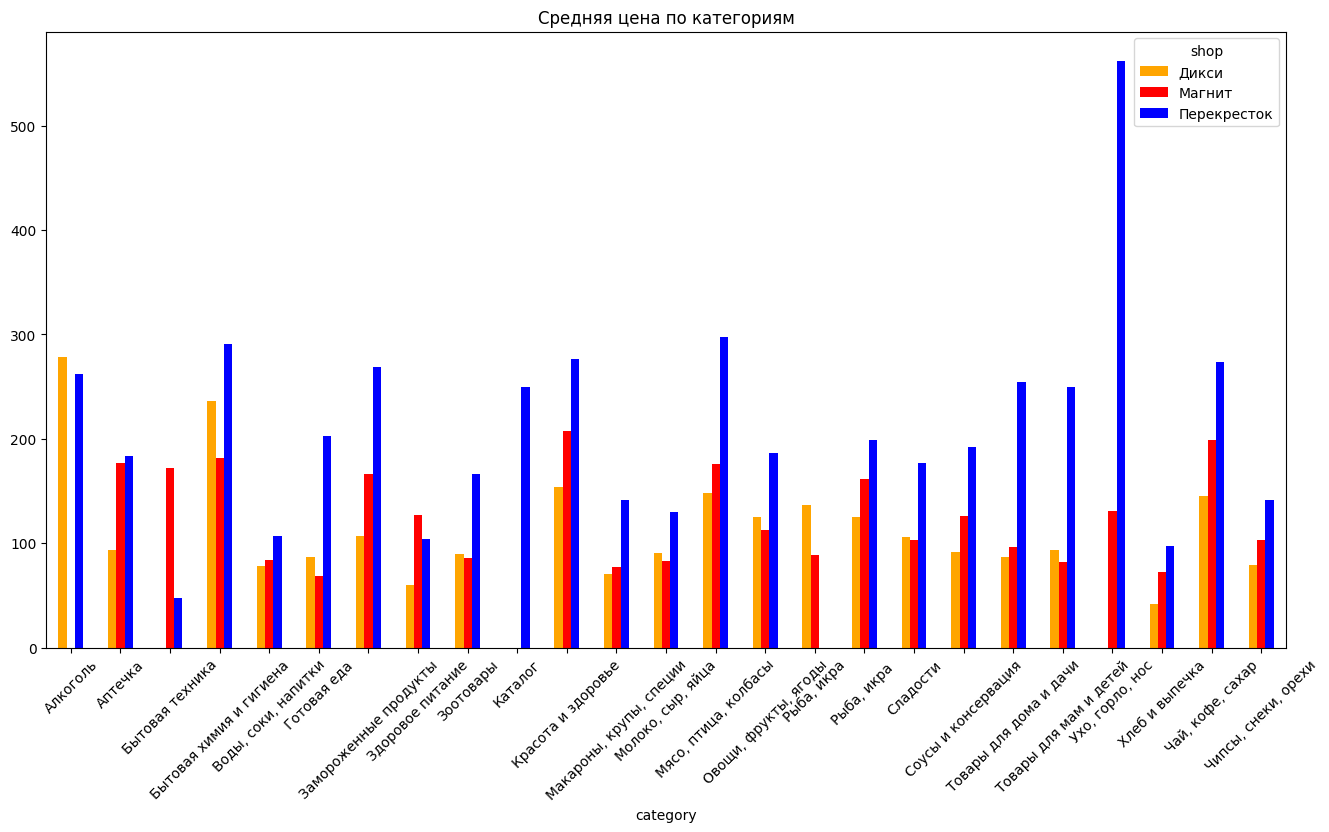

In [49]:
df_trimmed.groupby(
    ["shop", "category"]
)["currentPrice"].mean().unstack(0).plot.bar(
    figsize=(16, 8), color=["orange", "red", "blue"], rot=45
)

plt.title("Средняя цена по категориям")
plt.savefig("prices_shops.png", dpi=300, bbox_inches='tight')

<h3>Есть ли разница в ценах между локациями внутри сети</h3>

In [52]:
df_prod[df_prod.shop == "Магнит"].groupby(
    ["address", "category"]
)["currentPrice"].mean().to_frame().unstack(0).style.background_gradient(axis=1)

In [62]:
addrs = df_prod["address"].unique().tolist()
addrs

['Санкт-Петербург, Лиговский проспект, 2-4',
 'Санкт-Петербург, улица Беринга, 11',
 'Санкт-Петербург, Гатчинская улица, 7',
 'Санкт-Петербург, Гражданский проспект, 41к2Б',
 'Санкт-Петербург, проспект Художников, 12',
 nan]

In [71]:
df[df.magnit]

,address,reviews,rating,shop,longitude,latitude
0,"Санкт-Петербург, Средний просп. Васильевского ...",83.0,4.2,Магнит,30.249909,59.937200
1,"Санкт-Петербург, Малый просп. Васильевского ос...",571.0,4.1,Магнит,30.240457,59.938315
2,"Санкт-Петербург, Наличная ул., 35, корп. 1, ко...",399.0,3.9,Магнит,30.232841,59.940740
3,"Санкт-Петербург, Гаванская ул., 34, литер А, п...",84.0,4.0,Магнит,30.238154,59.935557
4,"Санкт-Петербург, ул. Нахимова, 8",370.0,3.8,Магнит,30.234647,59.943310
...,...,...,...,...,...,...
1989,"Санкт-Петербург, просп. Ветеранов, 169, корп. ...",759.0,3.2,Дикси,30.113892,59.835943
1990,"Санкт-Петербург, Никольское ш., 1, Отрадное",465.0,2.8,Дикси,30.773946,59.761998
1991,"Санкт-Петербург, Центральная ул., 19, г. Отрадное",506.0,4.0,Дикси,30.796557,59.767081
1992,"Санкт-Петербург, ул. Гагарина, 8, г. Отрадное",449.0,3.6,Дикси,30.804156,59.769207


In [249]:
df.groupby("shop")["rating"].count().to_frame().rename({"rating": "Количество магазинов"}, axis=1)

,Количество магазинов
shop,
Дикси,748
Магнит,989
Перекресток,257


<h3>Исследование плотности населения</h3>

In [79]:
from PyPDF2 import PdfReader

In [99]:
population_data = []

In [176]:
pop_str = """Центральный район 207165
муниципальный округ Дворцовый округ 6659
муниципальный округ N 78 10661
муниципальный округ Литейный округ 43017
муниципальный округ Смольнинское 74152
муниципальный округ Лиговка-Ямская 15956
муниципальный округ Владимирский округ 56720"""

In [177]:
for i, loc in enumerate(pop_str.split("\n")):
    
    if i == 0:
        parent_region = " ".join(loc.split(" ")[:-1])
        continue
        
    els = loc.split(" ")
    subregion = " ".join(els[:-1])
    num_people = els[-1]
    
    population_data.append({
        "subregion": subregion, 
        "population": num_people, 
        "region": parent_region, 
    })

In [181]:
with open("population_data.json", "w") as file:
    json.dump(population_data, file)

In [188]:
df_population = pd.read_json("population_data.json")
df_population.to_excel("population_data.xlsx", index=False)

In [226]:
df_population.head(50)

,subregion,population,region
0,муниципальный округ Коломна,37689,Адмиралтейский район
1,муниципальный округ Сенной округ,21416,Адмиралтейский район
2,муниципальный округ Адмиралтейский округ,22239,Адмиралтейский район
3,муниципальный округ Семёновский,22676,Адмиралтейский район
4,муниципальный округ Измайловское,25984,Адмиралтейский район
5,муниципальный округ Екатерингофский,23731,Адмиралтейский район
6,муниципальный округ N 7,40103,Василеостровский район
7,муниципальный округ Васильевский,32358,Василеостровский район
8,муниципальный округ Гавань,35498,Василеостровский район
9,муниципальный округ Морской,34188,Василеостровский район


In [239]:
polygon_list["муниципальный округ Сенной округ"]

[[59.920486, 30.299005],
 [59.920615, 30.299069],
 [59.922614, 30.307932],
 [59.926451, 30.308125],
 [59.926741, 30.305685],
 [59.927611, 30.305813],
 [59.929191, 30.3123],
 [59.93177, 30.309731],
 [59.932995, 30.315447],
 [59.925, 30.327136],
 [59.917778, 30.30151]]

In [234]:
polygon_list.update({
    "муниципальный округ Сенной округ": [
        [59.920486, 30.299005], [59.920615, 30.299069],
        [59.922614, 30.307932], [59.926451, 30.308125],
        [59.926741, 30.305685], [59.927611, 30.305813],
        [59.929191, 30.312300], [59.931770, 30.309731],
        [59.932995, 30.315447], [59.925000, 30.327136],
        [59.917778, 30.301510]
    ]
})

In [229]:
polygon_list

{'муниципальный округ Коломна': [[59.918942, 30.268291],
  [59.925747, 30.272818],
  [59.928796, 30.284393],
  [59.927718, 30.293817],
  [59.918235, 30.301089],
  [59.916227, 30.292407]]}

In [221]:
import requests
import folium
import geopandas as gpd

In [220]:
m = folium.Map(location=[59.918942, 30.268291], zoom_start=10, tiles='CartoDB positron')
m

In [235]:
polygon_coords = [
        [59.920486, 30.299005], [59.920615, 30.299069],
        [59.922614, 30.307932], [59.926451, 30.308125],
        [59.926741, 30.305685], [59.927611, 30.305813],
        [59.929191, 30.312300], [59.931770, 30.309731],
        [59.932995, 30.315447], [59.925000, 30.327136],
        [59.917778, 30.301510]
    ]

polygon = folium.Polygon(locations=polygon_coords, color='blue', fill_color='blue', fill_opacity=0.2)

In [236]:
polygon.add_to(m)

In [237]:
m